# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
data = datasets.load_wine()
X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [3]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [12]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)
labels =  kmeans.labels_
sample_size = len(X)

In [13]:
# evaluamos la clusterización con silhouette score
silhouette_score(X, labels=labels, metric='euclidean', sample_size=sample_size, random_state=None)

0.5406824747857625

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [14]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
labels =  kmeans.labels_
sample_size = len(X)
silhouette_score(X, labels=labels, metric='euclidean', sample_size=sample_size, random_state=None)

0.548999323979569

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [16]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
labels =  kmeans.labels_
sample_size = len(X)
silhouette_score(X, labels=labels, metric='euclidean', sample_size=sample_size, random_state=None)

0.5711381937868844

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

In [61]:
def Elbow_Visualizer(df, model_name):
    from yellowbrick.cluster import KElbowVisualizer
    from sklearn.cluster import AgglomerativeClustering
    from sklearn.cluster import KMeans    
    
    if model_name=='KMeans':
        model = KMeans()
    if model_name=='AgglomerativeClustering':
        model = AgglomerativeClustering()
    visualizer = KElbowVisualizer(model, k=(1,15))
    visualizer.fit(df)
    visualizer.poof();

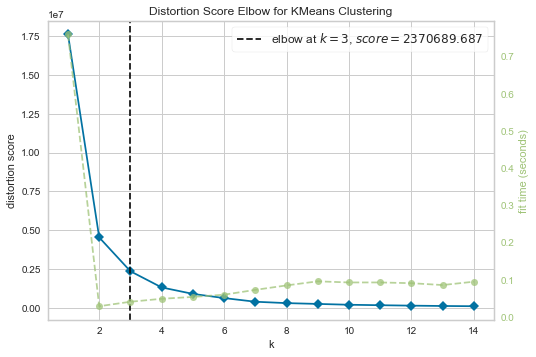

In [62]:
Elbow_Visualizer(X, 'KMeans')

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

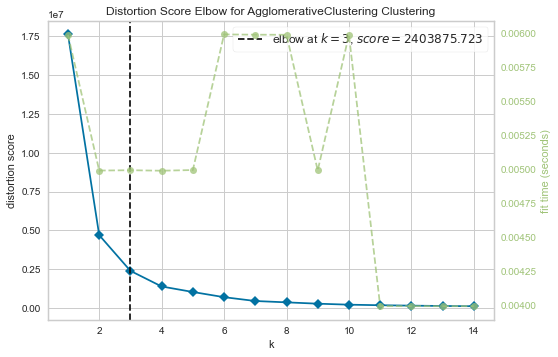

In [63]:
Elbow_Visualizer(X, 'AgglomerativeClustering')

In [ ]:
# ambos modelos proponen 3 clusters.

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [65]:
# Clusterizamos con KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
kmeans_clusters = kmeans.predict(X)

In [66]:
# Agregamos las predicciones al dataset
X['labels'] = kmeans_clusters

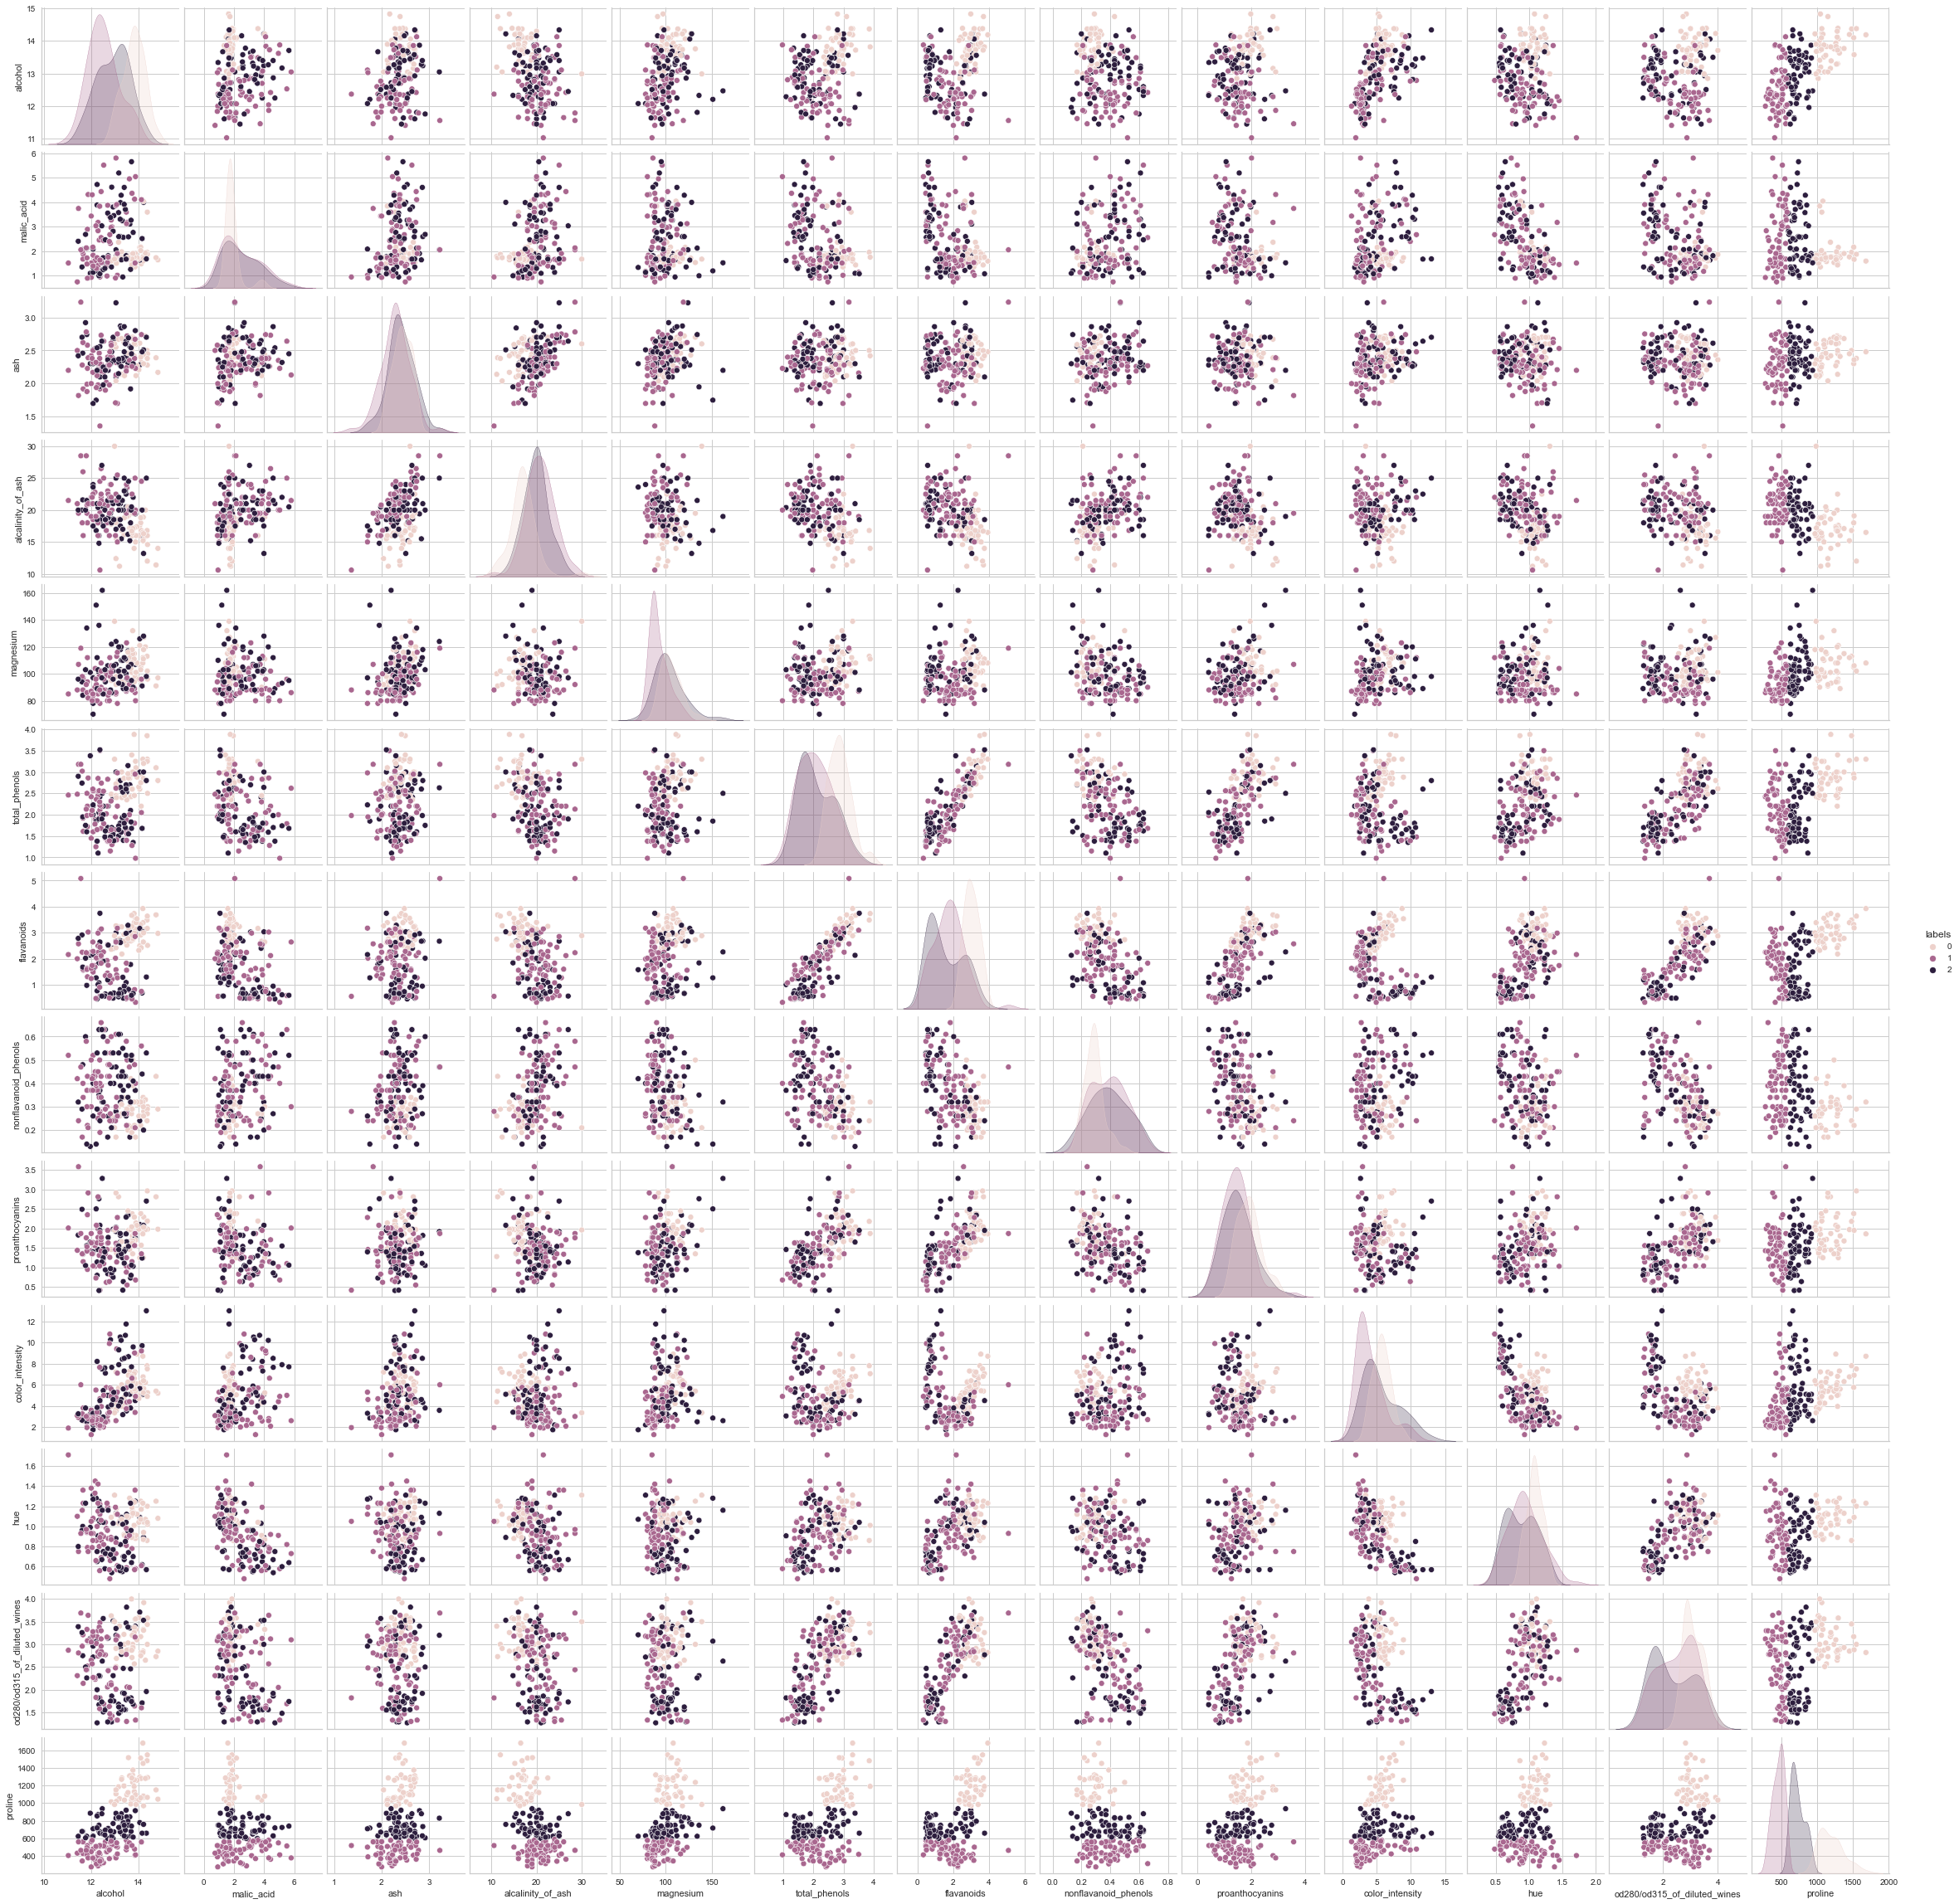

In [67]:
# Creamos el Scatter Matrix
sns.pairplot(data=X, kind='scatter', hue='labels');

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [69]:
from sklearn.decomposition import PCA

In [72]:
# creamos el Principal Components Analysis
pca = PCA(n_components=4)
pca_model = pca.fit_transform(X)
pca_X = pd.DataFrame(data=pca_model, columns=['pca_1', 'pca_2', 'pca_3', 'pca_4'])
pca_X.head()

,pca_1,pca_2,pca_3,pca_4
0,318.564096,21.482314,3.158624,-0.199290
1,303.098549,-5.372870,6.837001,-0.850245
2,438.062154,-6.543205,-1.096887,0.944695
3,733.240924,0.190868,-0.912396,-0.523645
4,-11.572578,18.499472,-0.571341,1.319993


In [74]:
# aplicamos la clusterización
kmeans = KMeans(n_clusters=3)
df_clusters = kmeans.fit(pca_X)
df_clusters.cluster_centers_

array([[ 4.48297788e+02, -2.26306681e+00,  4.82644535e-01,
         3.53695014e-01],
       [-1.84853368e+01,  4.21309004e+00, -4.60409653e-01,
        -6.36385559e-01],
       [-2.88752249e+02, -2.24416584e+00,  8.49435559e-02,
         3.30902014e-01]])

In [75]:
# Agregamos las etiquetas al PCA dataset 
pca_X['labels'] = df_clusters.fit_predict(pca_X)
pca_X.head(3)

,pca_1,pca_2,pca_3,pca_4,labels
0,318.564096,21.482314,3.158624,-0.199290,1
1,303.098549,-5.372870,6.837001,-0.850245,1
2,438.062154,-6.543205,-1.096887,0.944695,1


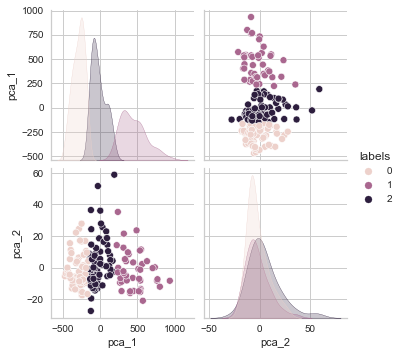

In [77]:
# Ploteamos los 2 principales componentes
data=pca_X[['pca_1','pca_2','labels']]
sns.pairplot(data=data, kind='scatter', hue='labels');

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

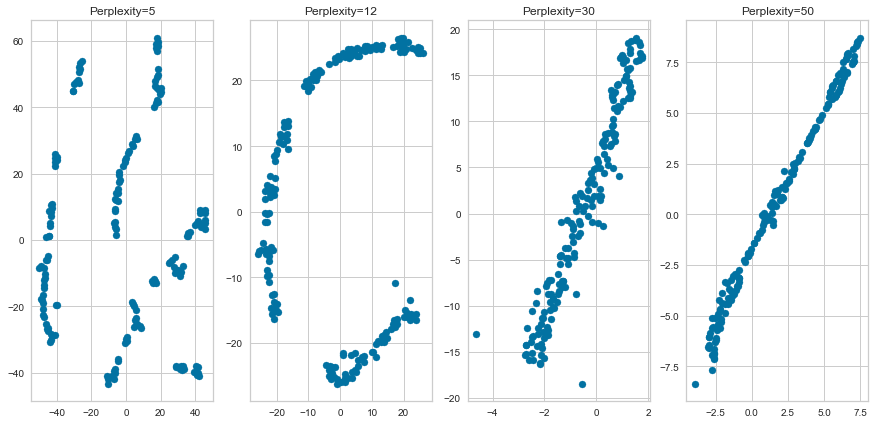

In [80]:
from sklearn.manifold import TSNE
data=pca_X[['pca_1','pca_2']]
fig, ax = plt.subplots(1,4, figsize = (15,7))
for i, perp in enumerate([5,12,30,50]):
  tsne = TSNE(perplexity = perp, random_state=123)
  x_embedded = tsne.fit_transform(data)
  ax[i].scatter(x_embedded[:,0], x_embedded[:,1])
  ax[i].set_title("Perplexity={}".format(perp))
plt.show()